<a href="https://colab.research.google.com/github/leon-czarlinski/IowaLiquorSales/blob/main/BigQuery_IowaSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'big-dataite-5324-0gb' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=big-dataite-5324-0gb:US:bquxjob_3c79c043_18a8ccf865b)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_7688b6e7_18a941fc411') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT invoice_and_item_number, date, store_number, store_name, address, city, zip_code, store_location, category_name, vendor_name, item_description, state_bottle_cost, state_bottle_retail, bottles_sold, sale_dollars, volume_sold_liters
FROM 
  `bigquery-public-data.iowa_liquor_sales.sales`
WHERE 
  sale_dollars > 0 
  AND date >= '2022-01-01' 
  AND date <= '2022-12-31'
  AND category_name LIKE '%VODKA'
  OR category_name LIKE '%WHISKIE'
  OR category_name LIKE '%RUM'


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_7688b6e7_18a941fc411') # Job ID inserted based on the query results selected to explore
sales_df = job.to_dataframe()
sales_df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,category_name,vendor_name,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
0,INV-39124100059,2021-08-11,2675,HY-VEE #2 / CORALVILLE,3285 CROSSPARK RD,CORALVILLE,52241.0,POINT(-91.606271 41.721438),WHITE RUM,"WORLDWIDE LIBATIONS, LLC",TIKI LOVERS WHITE RUM,12.50,18.75,24,450.00,18.00
1,S04655800042,2012-03-21,4619,SMOKIN' JOE'S #3 TOBACCO AND LIQUOR,1737 AVE H,FORT MADISON,52627,POINT(-91.329824 40.63021),SPICED RUM,DIAGEO AMERICAS,CAPTAIN MORGAN SPICED RUM,4.30,6.45,5,32.25,1.88
2,S30905500026,2016-02-24,4879,SAM'S MINI MART / MORNINGSIDE AVE SI,4218 MORNINGSIDE AVE,SIOUX CITY,51106,POINT(-96.352851 42.47063),FLAVORED RUM,PERNOD RICARD USA/AUSTIN NICHOLS,MALIBU COCONUT RUM,4.49,6.74,24,161.76,9.00
3,S06843900004,2012-07-30,3656,TARGET STORE T-1767 / ANKENY,2135 SE DELAWARE AVE,ANKENY,50021,POINT(-93.581201 41.708563),FLAVORED RUM,PERNOD RICARD USA/AUSTIN NICHOLS,MALIBU COCONUT RUM,6.90,10.35,12,124.20,9.00
4,S05269400012,2012-04-30,4019,WAL-MART 1506 / MANCHESTER,1220 WEST MAIN,MANCHESTER,52057,None,FLAVORED RUM,PERNOD RICARD USA/AUSTIN NICHOLS,MALIBU COCONUT RUM,6.90,10.35,12,124.20,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149743,S25018700009,2015-04-13,4154,FAREWAY STORES #055 / HIAWATHA,885 MILLER RD,HIAWATHA,52233,POINT(-91.702263 42.046486),SPICED RUM,"WILLIAM GRANT AND SONS, INC.",SAILOR JERRY SPICED NAVY RUM,9.65,14.48,3,43.44,2.25
3149744,S25359100021,2015-04-29,4161,FAREWAY STORES #950 / IOWA CITY,2530 WESTWINDS DR,IOWA CITY,52246,POINT(-91.575636 41.650842),SPICED RUM,"WILLIAM GRANT AND SONS, INC.",SAILOR JERRY SPICED NAVY RUM,9.65,14.48,3,43.44,2.25
3149745,S18612700027,2014-04-24,4478,U S GAS,"3000, SW 9TH ST",DES MOINES,50315,POINT(-93.625682 41.557862),SPICED RUM,"WILLIAM GRANT AND SONS, INC.",SAILOR JERRY SPICED NAVY RUM,9.65,14.48,3,43.44,2.25
3149746,INV-22562800093,2019-10-15,2513,HY-VEE FOOD STORE #2 / IOWA CITY,812 S 1ST AVE,IOWA CITY,52240.0,None,SPICED RUM,WILLIAM GRANT & SONS INC,SAILOR JERRY SPICED NAVY RUM,9.65,14.48,6,86.88,4.50


# Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
sales_df.describe()

,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
count,3.149748e+06,3.149748e+06,3149748.0,3.149748e+06,3.149748e+06
mean,8.821572e+00,1.324510e+01,10.40899,1.443335e+02,1.017657e+01
std,5.099400e+00,7.652004e+00,27.674874,5.180520e+02,3.370765e+01
min,0.000000e+00,0.000000e+00,-360.0,-9.720000e+03,-6.300000e+02
25%,5.780000e+00,8.670000e+00,3.0,3.288000e+01,2.250000e+00
50%,8.260000e+00,1.239000e+01,6.0,8.100000e+01,9.000000e+00
75%,1.049000e+01,1.574000e+01,12.0,1.574400e+02,1.050000e+01
max,5.500000e+03,8.250000e+03,15000.0,2.541000e+05,1.500000e+04


In [ ]:
sales_df.head(5)

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,category_name,vendor_name,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
0,INV-39124100059,2021-08-11,2675,HY-VEE #2 / CORALVILLE,3285 CROSSPARK RD,CORALVILLE,52241.0,POINT(-91.606271 41.721438),WHITE RUM,"WORLDWIDE LIBATIONS, LLC",TIKI LOVERS WHITE RUM,12.50,18.75,24,450.00,18.00
1,S04655800042,2012-03-21,4619,SMOKIN' JOE'S #3 TOBACCO AND LIQUOR,1737 AVE H,FORT MADISON,52627,POINT(-91.329824 40.63021),SPICED RUM,DIAGEO AMERICAS,CAPTAIN MORGAN SPICED RUM,4.30,6.45,5,32.25,1.88
2,S30905500026,2016-02-24,4879,SAM'S MINI MART / MORNINGSIDE AVE SI,4218 MORNINGSIDE AVE,SIOUX CITY,51106,POINT(-96.352851 42.47063),FLAVORED RUM,PERNOD RICARD USA/AUSTIN NICHOLS,MALIBU COCONUT RUM,4.49,6.74,24,161.76,9.00
3,S06843900004,2012-07-30,3656,TARGET STORE T-1767 / ANKENY,2135 SE DELAWARE AVE,ANKENY,50021,POINT(-93.581201 41.708563),FLAVORED RUM,PERNOD RICARD USA/AUSTIN NICHOLS,MALIBU COCONUT RUM,6.90,10.35,12,124.20,9.00
4,S05269400012,2012-04-30,4019,WAL-MART 1506 / MANCHESTER,1220 WEST MAIN,MANCHESTER,52057,None,FLAVORED RUM,PERNOD RICARD USA/AUSTIN NICHOLS,MALIBU COCONUT RUM,6.90,10.35,12,124.20,9.00


In [ ]:
sales_df.shape

(3149748, 16)

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149748 entries, 0 to 3149747
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     dbdate 
 2   store_number             object 
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 object 
 7   store_location           object 
 8   category_name            object 
 9   vendor_name              object 
 10  item_description         object 
 11  state_bottle_cost        float64
 12  state_bottle_retail      float64
 13  bottles_sold             Int64  
 14  sale_dollars             float64
 15  volume_sold_liters       float64
dtypes: Int64(1), dbdate(1), float64(4), object(10)
memory usage: 387.5+ MB


# Exploratory Data Analysis

Let's explore the dataset to answer the following questions:
* What is the best month for sales?
* What city had the highest number of sales?
* What product are most often sold together?
* What product was sold the most and why?

In [ ]:
df = sales_df.copy()
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,category_name,vendor_name,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
0,INV-39124100059,2021-08-11,2675,HY-VEE #2 / CORALVILLE,3285 CROSSPARK RD,CORALVILLE,52241.0,POINT(-91.606271 41.721438),WHITE RUM,"WORLDWIDE LIBATIONS, LLC",TIKI LOVERS WHITE RUM,12.50,18.75,24,450.00,18.00
1,S04655800042,2012-03-21,4619,SMOKIN' JOE'S #3 TOBACCO AND LIQUOR,1737 AVE H,FORT MADISON,52627,POINT(-91.329824 40.63021),SPICED RUM,DIAGEO AMERICAS,CAPTAIN MORGAN SPICED RUM,4.30,6.45,5,32.25,1.88
2,S30905500026,2016-02-24,4879,SAM'S MINI MART / MORNINGSIDE AVE SI,4218 MORNINGSIDE AVE,SIOUX CITY,51106,POINT(-96.352851 42.47063),FLAVORED RUM,PERNOD RICARD USA/AUSTIN NICHOLS,MALIBU COCONUT RUM,4.49,6.74,24,161.76,9.00
3,S06843900004,2012-07-30,3656,TARGET STORE T-1767 / ANKENY,2135 SE DELAWARE AVE,ANKENY,50021,POINT(-93.581201 41.708563),FLAVORED RUM,PERNOD RICARD USA/AUSTIN NICHOLS,MALIBU COCONUT RUM,6.90,10.35,12,124.20,9.00
4,S05269400012,2012-04-30,4019,WAL-MART 1506 / MANCHESTER,1220 WEST MAIN,MANCHESTER,52057,None,FLAVORED RUM,PERNOD RICARD USA/AUSTIN NICHOLS,MALIBU COCONUT RUM,6.90,10.35,12,124.20,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149743,S25018700009,2015-04-13,4154,FAREWAY STORES #055 / HIAWATHA,885 MILLER RD,HIAWATHA,52233,POINT(-91.702263 42.046486),SPICED RUM,"WILLIAM GRANT AND SONS, INC.",SAILOR JERRY SPICED NAVY RUM,9.65,14.48,3,43.44,2.25
3149744,S25359100021,2015-04-29,4161,FAREWAY STORES #950 / IOWA CITY,2530 WESTWINDS DR,IOWA CITY,52246,POINT(-91.575636 41.650842),SPICED RUM,"WILLIAM GRANT AND SONS, INC.",SAILOR JERRY SPICED NAVY RUM,9.65,14.48,3,43.44,2.25
3149745,S18612700027,2014-04-24,4478,U S GAS,"3000, SW 9TH ST",DES MOINES,50315,POINT(-93.625682 41.557862),SPICED RUM,"WILLIAM GRANT AND SONS, INC.",SAILOR JERRY SPICED NAVY RUM,9.65,14.48,3,43.44,2.25
3149746,INV-22562800093,2019-10-15,2513,HY-VEE FOOD STORE #2 / IOWA CITY,812 S 1ST AVE,IOWA CITY,52240.0,None,SPICED RUM,WILLIAM GRANT & SONS INC,SAILOR JERRY SPICED NAVY RUM,9.65,14.48,6,86.88,4.50


In [ ]:
import pandas as pd
df['month'] = pd.to_datetime(df['date']).dt.month
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,category_name,vendor_name,item_description,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,month
0,INV-39124100059,2021-08-11,2675,HY-VEE #2 / CORALVILLE,3285 CROSSPARK RD,CORALVILLE,52241.0,POINT(-91.606271 41.721438),WHITE RUM,"WORLDWIDE LIBATIONS, LLC",TIKI LOVERS WHITE RUM,12.50,18.75,24,450.00,18.00,8
1,S04655800042,2012-03-21,4619,SMOKIN' JOE'S #3 TOBACCO AND LIQUOR,1737 AVE H,FORT MADISON,52627,POINT(-91.329824 40.63021),SPICED RUM,DIAGEO AMERICAS,CAPTAIN MORGAN SPICED RUM,4.30,6.45,5,32.25,1.88,3
2,S30905500026,2016-02-24,4879,SAM'S MINI MART / MORNINGSIDE AVE SI,4218 MORNINGSIDE AVE,SIOUX CITY,51106,POINT(-96.352851 42.47063),FLAVORED RUM,PERNOD RICARD USA/AUSTIN NICHOLS,MALIBU COCONUT RUM,4.49,6.74,24,161.76,9.00,2
3,S06843900004,2012-07-30,3656,TARGET STORE T-1767 / ANKENY,2135 SE DELAWARE AVE,ANKENY,50021,POINT(-93.581201 41.708563),FLAVORED RUM,PERNOD RICARD USA/AUSTIN NICHOLS,MALIBU COCONUT RUM,6.90,10.35,12,124.20,9.00,7
4,S05269400012,2012-04-30,4019,WAL-MART 1506 / MANCHESTER,1220 WEST MAIN,MANCHESTER,52057,None,FLAVORED RUM,PERNOD RICARD USA/AUSTIN NICHOLS,MALIBU COCONUT RUM,6.90,10.35,12,124.20,9.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149743,S25018700009,2015-04-13,4154,FAREWAY STORES #055 / HIAWATHA,885 MILLER RD,HIAWATHA,52233,POINT(-91.702263 42.046486),SPICED RUM,"WILLIAM GRANT AND SONS, INC.",SAILOR JERRY SPICED NAVY RUM,9.65,14.48,3,43.44,2.25,4
3149744,S25359100021,2015-04-29,4161,FAREWAY STORES #950 / IOWA CITY,2530 WESTWINDS DR,IOWA CITY,52246,POINT(-91.575636 41.650842),SPICED RUM,"WILLIAM GRANT AND SONS, INC.",SAILOR JERRY SPICED NAVY RUM,9.65,14.48,3,43.44,2.25,4
3149745,S18612700027,2014-04-24,4478,U S GAS,"3000, SW 9TH ST",DES MOINES,50315,POINT(-93.625682 41.557862),SPICED RUM,"WILLIAM GRANT AND SONS, INC.",SAILOR JERRY SPICED NAVY RUM,9.65,14.48,3,43.44,2.25,4
3149746,INV-22562800093,2019-10-15,2513,HY-VEE FOOD STORE #2 / IOWA CITY,812 S 1ST AVE,IOWA CITY,52240.0,None,SPICED RUM,WILLIAM GRANT & SONS INC,SAILOR JERRY SPICED NAVY RUM,9.65,14.48,6,86.88,4.50,10


In [ ]:
month_sales = df.groupby('month')[['sale_dollars', 'volume_sold_liters', 'bottles_sold']].sum()
month_sales

,sale_dollars,volume_sold_liters,bottles_sold
month,,,
1,31510483.77,2245311.43,2358556
2,31945609.27,2281449.06,2335853
3,39854438.70,2804578.40,2769391
4,36820389.81,2612767.50,2704995
5,41242531.89,2919704.17,2980134
6,43136538.79,3023606.24,3132003
7,40169697.94,2818545.91,2903692
8,39007911.29,2749420.45,2867068
9,35060992.18,2468002.04,2490059


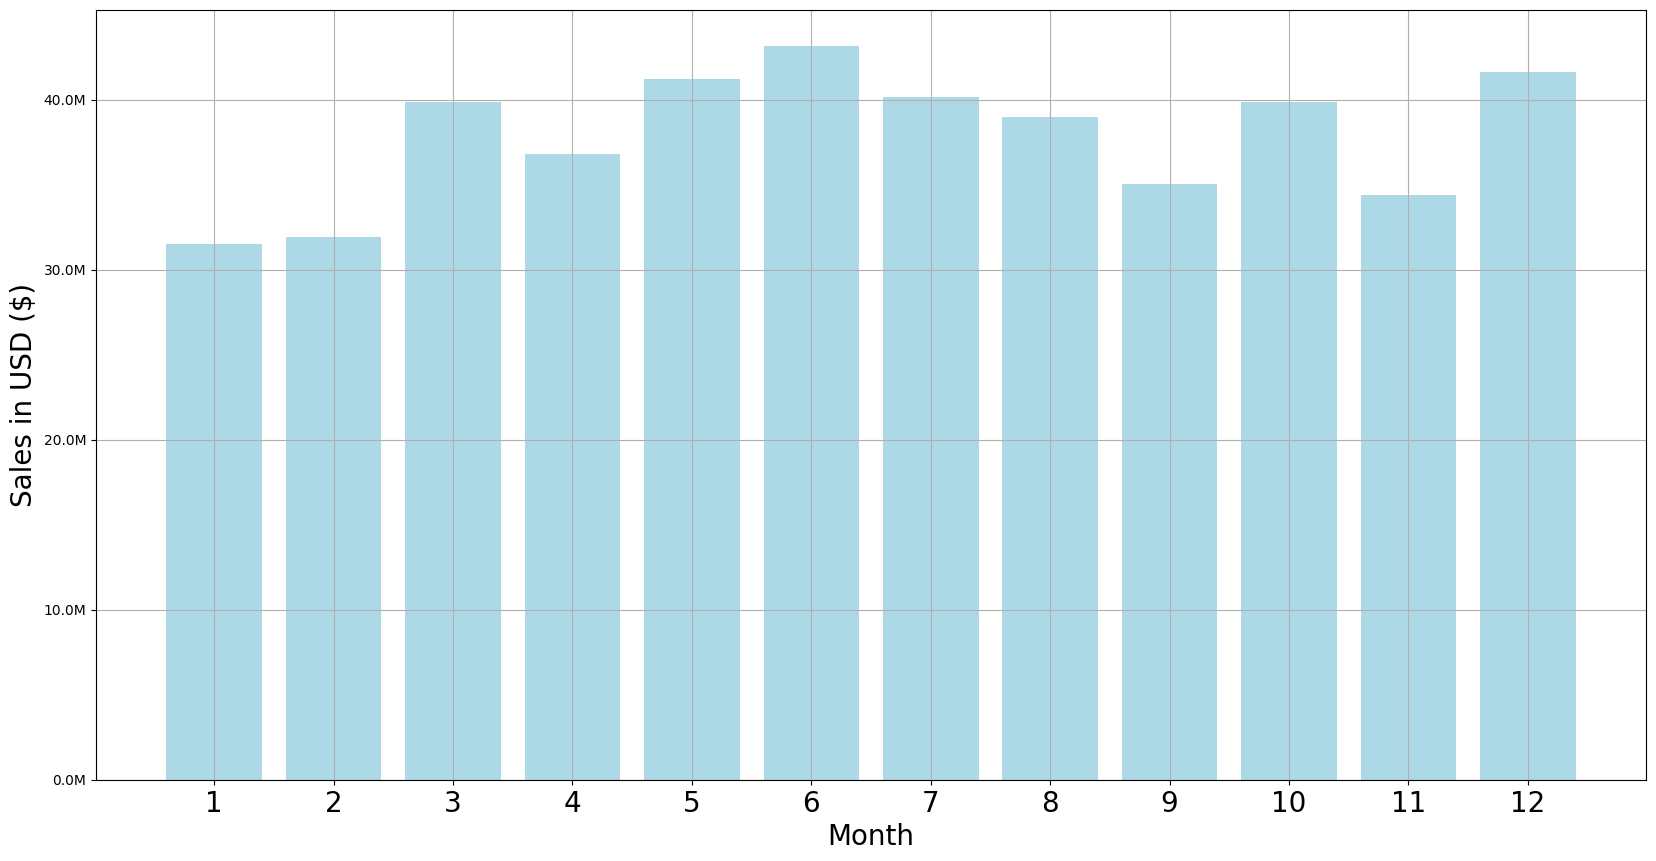

In [ ]:
from matplotlib.ticker import FuncFormatter
from matplotlib.projections.geo import Formatter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

months = range (1,13)
months

def millions_formatter(x, pos):
  return f'{x/1e6:.1f}M'

plt.figure(figsize=(20,10))
plt.bar(months, month_sales['sale_dollars'], color='lightblue')
plt.xticks(months, size=20)
plt.ylabel('Sales in USD ($)', size = 20)
plt.xlabel('Month', size = 20)
plt.grid()

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
